<a href="https://colab.research.google.com/github/Artshouldterrify/weather/blob/main/weather_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download jehanbhathena/weather-dataset

 98% 574M/587M [00:05<00:00, 125MB/s]
100% 587M/587M [00:05<00:00, 116MB/s]


In [ ]:
!kaggle datasets download jagadeesh23/weather-classification

 97% 249M/258M [00:04<00:00, 102MB/s]
100% 258M/258M [00:04<00:00, 66.7MB/s]


In [ ]:
!unzip /content/weather-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [ ]:
!unzip /content/weather-classification.zip

Archive:  /content/weather-classification.zip
  inflating: Data/0/10161882.jpg     
  inflating: Data/0/10389440.jpg     
  inflating: Data/0/10416398.jpg     
  inflating: Data/0/10441247.jpg     
  inflating: Data/0/10441367.jpg     
  inflating: Data/0/10441428.jpg     
  inflating: Data/0/10441514.jpg     
  inflating: Data/0/10730097.jpg     
  inflating: Data/0/10875329.jpg     
  inflating: Data/0/10990763.jpg     
  inflating: Data/0/11072393.jpg     
  inflating: Data/0/11072437.jpg     
  inflating: Data/0/11072473.jpg     
  inflating: Data/0/11072500.jpg     
  inflating: Data/0/11072561.jpg     
  inflating: Data/0/11072717.jpg     
  inflating: Data/0/11077439.jpg     
  inflating: Data/0/11077514.jpg     
  inflating: Data/0/11077566.jpg     
  inflating: Data/0/11097300.jpg     
  inflating: Data/0/11164429.jpg     
  inflating: Data/0/11164432.jpg     
  inflating: Data/0/11164437.jpg     
  inflating: Data/0/11164485.jpg     
  inflating: Data/0/11313980.jpg     
  in

In [ ]:
cd ..

/


In [ ]:
rm /content/Data/4/*

In [ ]:
rmdir /content/Data/.ipynb_checkpoints/

In [ ]:
# loading the images into a Dataset object

batch_size, h, w = 32, 224, 224
train_ds = tf.keras.utils.image_dataset_from_directory("/content/Data", image_size=(h, w), subset="training", validation_split=0.2, seed=12, batch_size=batch_size, labels="inferred", label_mode="int")
test_ds = tf.keras.utils.image_dataset_from_directory("/content/Data", image_size=(h, w), subset="validation", validation_split=0.2, seed=12, batch_size=batch_size, labels="inferred", label_mode="int")
class_names = train_ds.class_names
train_ds.class_names, test_ds.class_names

Found 5142 files belonging to 6 classes.
Using 4114 files for training.
Found 5142 files belonging to 6 classes.
Using 1028 files for validation.


(['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Stormy', 'Sunny'],
 ['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Stormy', 'Sunny'])

In [ ]:
from pathlib import Path
import imghdr
import os

data_dir = "/content/Data"
image_extensions = [".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

/content/Data/Foggy/4183.jpg is not an image
/content/Data/Foggy/4476.jpg is not an image
/content/Data/Foggy/4700.jpg is not an image
/content/Data/Foggy/4669.jpg is not an image
/content/Data/Foggy/4776.jpg is not an image
/content/Data/Foggy/4505.jpg is not an image
/content/Data/Foggy/4560.jpg is not an image
/content/Data/Foggy/4583.jpg is not an image
/content/Data/Foggy/4836.jpg is not an image
/content/Data/Foggy/4626.jpg is not an image
/content/Data/Foggy/4739.jpg is not an image
/content/Data/Foggy/4523.jpg is not an image
/content/Data/Foggy/4471.jpg is not an image
/content/Data/Foggy/4625.jpg is not an image
/content/Data/Foggy/4563.jpg is not an image
/content/Data/Foggy/4726.jpg is not an image
/content/Data/Foggy/4575.jpg is not an image
/content/Data/Foggy/4812.jpg is not an image
/content/Data/Foggy/4075.jpg is not an image
/content/Data/Foggy/4188.jpg is not an image
/content/Data/Foggy/4358.jpg is not an image
/content/Data/Rainy/61.jpg is a tiff, not accepted by T

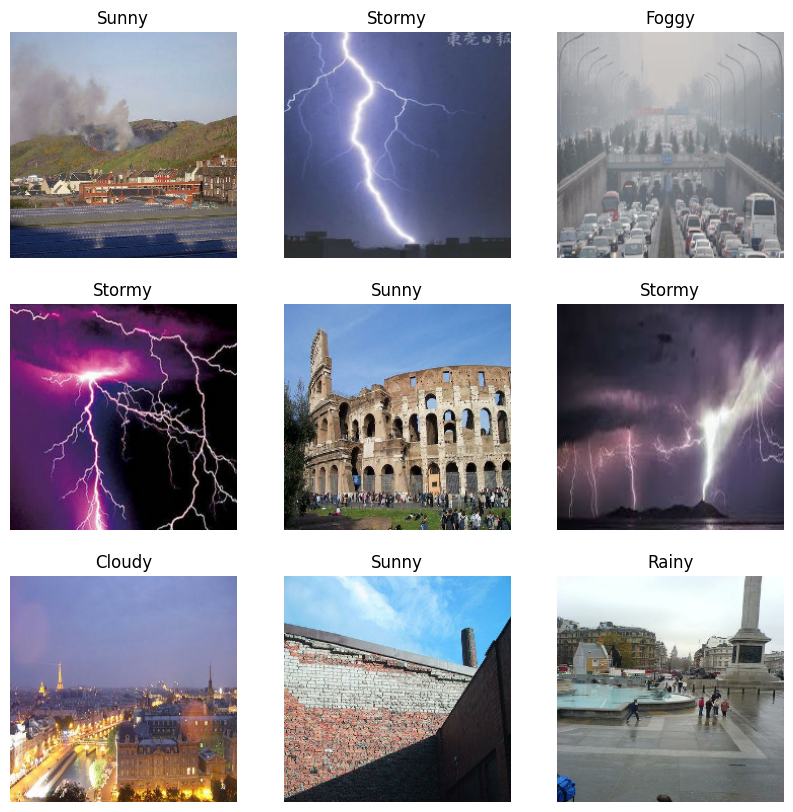

In [ ]:
# visualizing data

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
def pre(img, label):
  return tf.keras.applications.mobilenet.preprocess_input(img), label

train_ds = train_ds.map(pre)
test_ds = test_ds.map(pre)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
for img, label in train_ds.take(1):
  print(img.shape)

(32, 224, 224, 3)


In [ ]:
# model

base_model = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = False
inputs = tf.keras.Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(len(class_names))(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                

In [ ]:
# training the model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy')
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics
              =["accuracy"])
history = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=[early_stop])

Epoch 1/50
129/129 [==============================] - 263s 2s/step - loss: 1.9649 - accuracy: 0.1864 - val_loss: 1.7060 - val_accuracy: 0.2675
Epoch 2/50
129/129 [==============================] - 208s 2s/step - loss: 1.6315 - accuracy: 0.3230 - val_loss: 1.4853 - val_accuracy: 0.4018
Epoch 3/50
129/129 [==============================] - 246s 2s/step - loss: 1.4405 - accuracy: 0.4390 - val_loss: 1.3249 - val_accuracy: 0.5126
Epoch 4/50
129/129 [==============================] - 252s 2s/step - loss: 1.2944 - accuracy: 0.5146 - val_loss: 1.1997 - val_accuracy: 0.5632
Epoch 5/50
129/129 [==============================] - 246s 2s/step - loss: 1.1815 - accuracy: 0.5654 - val_loss: 1.1045 - val_accuracy: 0.5973
Epoch 6/50
129/129 [==============================] - 212s 2s/step - loss: 1.0933 - accuracy: 0.5946 - val_loss: 1.0332 - val_accuracy: 0.6158
Epoch 7/50
129/129 [==============================] - 248s 2s/step - loss: 1.0232 - accuracy: 0.6193 - val_loss: 0.9777 - val_accuracy: 0.6245

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002), metrics
              =["accuracy"])
history_1 = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=[early_stop])

Epoch 1/50
129/129 [==============================] - 210s 2s/step - loss: 0.7640 - accuracy: 0.7078 - val_loss: 0.7754 - val_accuracy: 0.6770
Epoch 2/50
129/129 [==============================] - 205s 2s/step - loss: 0.7242 - accuracy: 0.7258 - val_loss: 0.7555 - val_accuracy: 0.6897
Epoch 3/50
129/129 [==============================] - 205s 2s/step - loss: 0.6937 - accuracy: 0.7355 - val_loss: 0.7351 - val_accuracy: 0.6907
Epoch 4/50
129/129 [==============================] - 203s 2s/step - loss: 0.6675 - accuracy: 0.7460 - val_loss: 0.7233 - val_accuracy: 0.6926
Epoch 5/50
129/129 [==============================] - 203s 2s/step - loss: 0.6453 - accuracy: 0.7513 - val_loss: 0.7133 - val_accuracy: 0.7004
Epoch 6/50
129/129 [==============================] - 203s 2s/step - loss: 0.6245 - accuracy: 0.7628 - val_loss: 0.7067 - val_accuracy: 0.7023
Epoch 7/50
129/129 [==============================] - 244s 2s/step - loss: 0.6076 - accuracy: 0.7718 - val_loss: 0.6896 - val_accuracy: 0.7082

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00006), metrics
              =["accuracy"])
history_2 = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=[early_stop])

Epoch 1/50
129/129 [==============================] - 252s 2s/step - loss: 0.5647 - accuracy: 0.7897 - val_loss: 0.6671 - val_accuracy: 0.7150
Epoch 2/50
129/129 [==============================] - 206s 2s/step - loss: 0.5293 - accuracy: 0.8043 - val_loss: 0.6484 - val_accuracy: 0.7237
Epoch 3/50
129/129 [==============================] - 206s 2s/step - loss: 0.5018 - accuracy: 0.8119 - val_loss: 0.6442 - val_accuracy: 0.7364
Epoch 4/50
129/129 [==============================] - 247s 2s/step - loss: 0.4761 - accuracy: 0.8284 - val_loss: 0.6325 - val_accuracy: 0.7354


In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=1)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics
              =["accuracy"])
history = model.fit(train_ds, epochs=50, validation_data=test_ds, callbacks=[early_stop])

Epoch 1/50
129/129 [==============================] - 214s 2s/step - loss: 0.4639 - accuracy: 0.8359 - val_loss: 0.6241 - val_accuracy: 0.7422
Epoch 2/50
129/129 [==============================] - 243s 2s/step - loss: 0.4251 - accuracy: 0.8456 - val_loss: 0.6189 - val_accuracy: 0.7403


In [ ]:
base_model = model.layers[1]
base_model.trainable = True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 2,422,726
Trainable params: 2,388,614
Non-train

In [ ]:
len(base_model.layers)

154

In [ ]:
fine_tune_at = 140

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005), metrics=["accuracy"])

fine_tune_hist = model.fit(train_ds, epochs=20, validation_data=test_ds, callbacks=[early_stop])

Epoch 1/20
129/129 [==============================] - 261s 2s/step - loss: 0.3674 - accuracy: 0.8782 - val_loss: 0.6130 - val_accuracy: 0.7510
Epoch 2/20
129/129 [==============================] - 278s 2s/step - loss: 0.3255 - accuracy: 0.8855 - val_loss: 0.5973 - val_accuracy: 0.7588
Epoch 3/20
129/129 [==============================] - 236s 2s/step - loss: 0.2959 - accuracy: 0.9028 - val_loss: 0.5941 - val_accuracy: 0.7685
Epoch 4/20
129/129 [==============================] - 236s 2s/step - loss: 0.2719 - accuracy: 0.9159 - val_loss: 0.5983 - val_accuracy: 0.7626


In [ ]:
model.save('weather_model.h5')

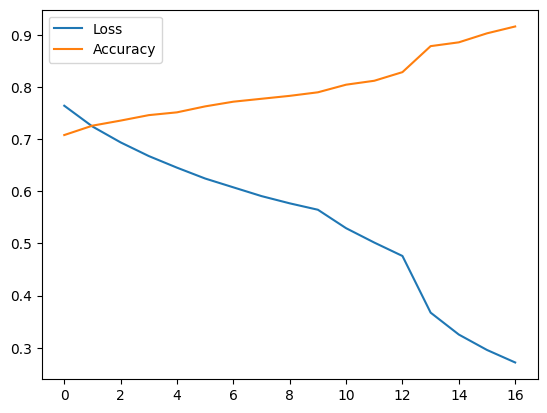

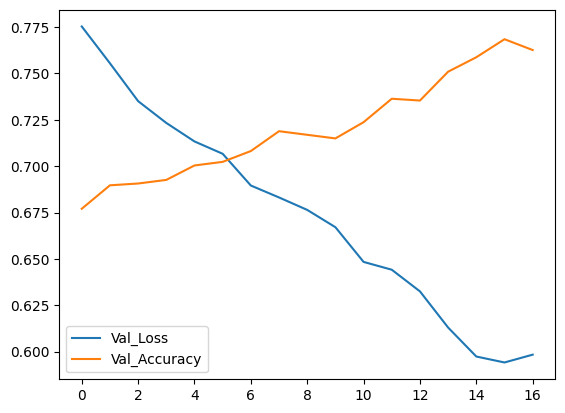

In [ ]:
# loss curve

l = np.concatenate([history_1.history['loss'], history_2.history['loss'], fine_tune_hist.history['loss']])
acc = np.concatenate([history_1.history['accuracy'], history_2.history['accuracy'], fine_tune_hist.history['accuracy']])
lv = np.concatenate([history_1.history['val_loss'], history_2.history['val_loss'], fine_tune_hist.history['val_loss']])
accv = np.concatenate([history_1.history['val_accuracy'], history_2.history['val_accuracy'], fine_tune_hist.history['val_accuracy']])

plt.plot(l, label="Loss")
plt.plot(acc, label="Accuracy")
plt.legend()
plt.show()
plt.plot(lv, label="Val_Loss")
plt.plot(accv, label="Val_Accuracy")
plt.legend()
plt.show()

33/33 [==============================] - 39s 1s/step


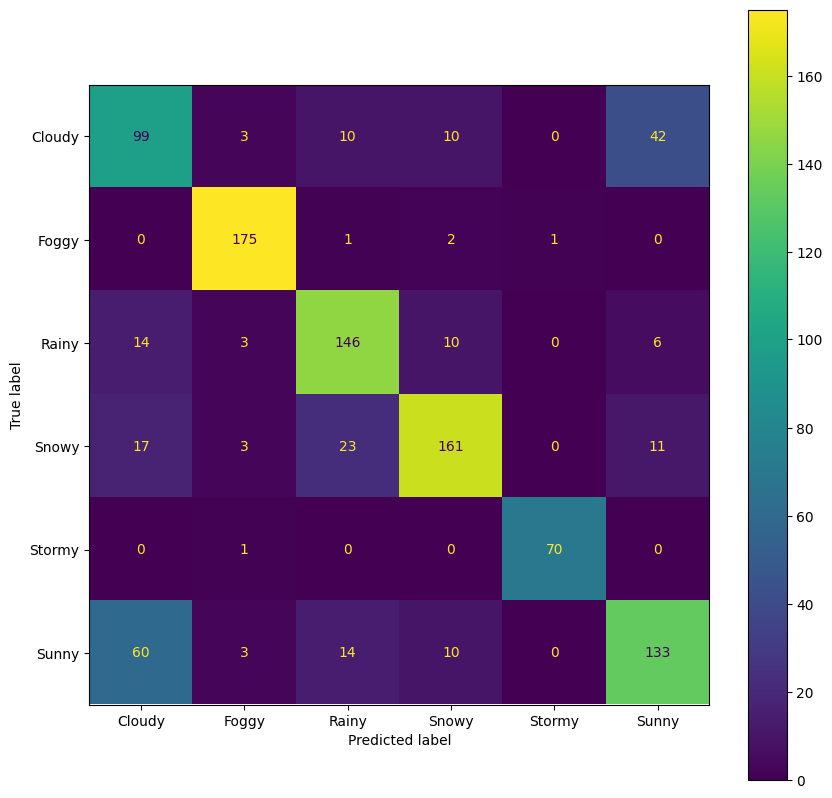

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = model.predict(test_ds)
y_pred_test
y_pred = np.argmax(y_pred_test, axis=1)
y_test = np.concatenate([y for x, y in test_ds], axis=0)
cm = confusion_matrix(y_pred, y_test)
f = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
f.plot(ax=ax)

In [ ]:
import sklearn.metrics as sk

p, r, f, b = sk.precision_score(y_pred, y_test, average="weighted"), sk.recall_score(y_pred, y_test, average="weighted"), sk.f1_score(y_pred, y_test, average="weighted"), sk.balanced_accuracy_score(y_pred, y_test)
p, r, f, b

(0.7670568843873695,
 0.7626459143968871,
 0.7629242745655258,
 0.7893754637960613)

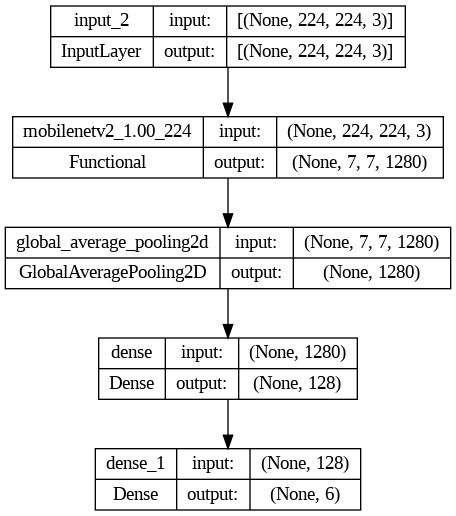

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
class_names

['cloudy',
 'foggy',
 'hail',
 'lightning',
 'rainy',
 'sandstorm',
 'snowy',
 'sunny']

In [ ]:
from PIL import Image
import numpy as np

im = Image.open('/content/20221106_160838.jpg', 'r')
pix = np.array(im.getdata())
pix

array([[ 84, 129,  90],
       [119, 164, 125],
       [119, 164, 123],
       ...,
       [ 95, 150,  56],
       [ 98, 154,  57],
       [ 98, 154,  57]])

In [ ]:
im = im.resize((224, 224), Image.ANTIALIAS)
pix = np.array(im.getdata())
pix

<ipython-input-4-6ead36389725>:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im = im.resize((200, 200), Image.ANTIALIAS)


TypeError: ignored

In [ ]:
pix = pix.reshape((1, 200, 200, 3))

In [ ]:
pix.shape

(1, 200, 200, 3)

In [ ]:
pix = tf.keras.applications.resnet50.preprocess_input(pix)
pix

array([[[[ -69.939    ,  -35.779    ,  -94.68     ],
         [ -79.939    ,  -34.779    , -100.68     ],
         [ -91.939    ,  -47.779    , -109.68     ],
         ...,
         [ -32.939003 ,   20.221    ,   13.32     ],
         [ -46.939003 ,   55.221    ,  -14.68     ],
         [  58.060997 ,   99.221    ,   18.32     ]],

        [[ -62.939003 ,  -52.779    , -102.68     ],
         [   4.060997 ,   -0.7789993,  -64.68     ],
         [   2.060997 ,    2.2210007,  -60.68     ],
         ...,
         [ -12.939003 ,    3.2210007,   49.32     ],
         [ -54.939003 ,    4.2210007,  -19.68     ],
         [ -40.939003 ,   19.221    ,  -44.68     ]],

        [[ -28.939003 ,  -32.779    ,  -83.68     ],
         [  49.060997 ,   22.221    ,  -37.68     ],
         [ -10.939003 ,  -14.778999 ,  -70.68     ],
         ...,
         [   2.060997 ,    9.221001 ,   44.32     ],
         [ -65.939    ,  -36.779    ,  -53.68     ],
         [-103.939    ,  -40.779    , -105.68     ]],

In [ ]:
model = tf.keras.models.load_model('/weather_model.h5')

In [ ]:
model.predict(pix)

1/1 [==============================] - 2s 2s/step


array([[ 1.8424048 ,  0.62396264, 11.408664  , -5.1176877 ,  5.0869355 ,
         1.3056371 ,  3.9252625 ,  2.4829068 ]], dtype=float32)